In [1]:
#customer SegMentation
# load dataset
import pandas as pd
data = pd.read_csv('Customers.csv')
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
72,73,Female,60,50,49
195,196,Female,35,120,79
151,152,Male,39,78,88
31,32,Female,21,30,73
127,128,Male,40,71,95


In [3]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]

# rename names of columns for simplicity
data = data.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})

data.sample(5)

,income,score
6,18,6
33,33,92
152,78,20
182,98,15
194,120,16


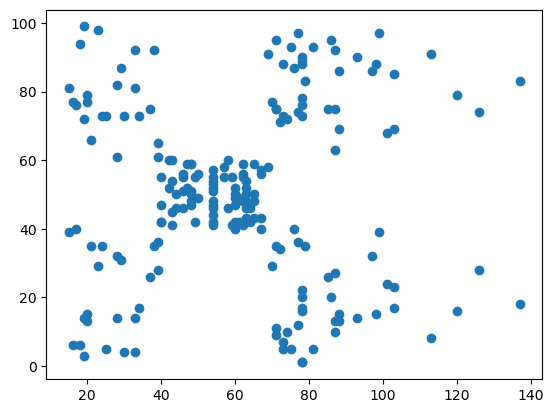

In [5]:
# visualize the data distribution
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'])

In [23]:
# calculate sum of squares errors for different K values
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []

for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

In [9]:
# sum of squares error for K=1 to k=10
wcss_error

[269981.28,
 186362.95600651755,
 106348.37306211122,
 73679.78903948836,
 66497.19879639812,
 37265.86520484346,
 30566.45113025185,
 28437.45732804018,
 32176.50491258741,
 22201.681486962647]

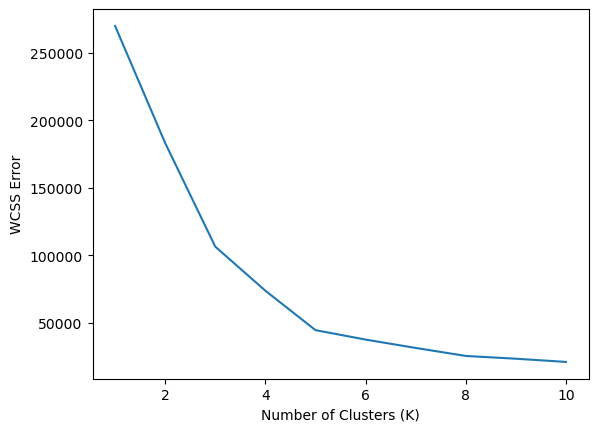

In [25]:
# plot WCSS error corresponding to different K values
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS Error')
plt.plot(k_values, wcss_error)

In [27]:
# train model using k=5
model = KMeans(n_clusters=5)
pred = model.fit_predict(data[['income','score']])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
# see predicted clusters
pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [31]:
# add cluster column to dataset
data['cluster'] = pred

In [35]:
data.sample(5)

,income,score,cluster
106,63,50,3
69,48,47,3
51,42,60,3
43,39,61,3
138,74,10,1


In [37]:
# centers of clusters
model.cluster_centers_

array([[25.72727273, 79.36363636],
       [87.75      , 17.58333333],
       [86.53846154, 82.12820513],
       [55.0875    , 49.7125    ],
       [26.30434783, 20.91304348]])

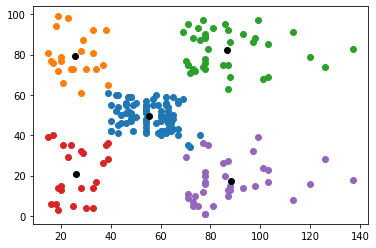

In [47]:
# visualize clusted data

cluster1 = data[data['cluster']==0]
plt.scatter(cluster1['income'], cluster1['score'])

cluster2 = data[data['cluster']==1]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==2]
plt.scatter(cluster3['income'], cluster3['score'])

cluster2 = data[data['cluster']==3]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==4]
plt.scatter(cluster3['income'], cluster3['score'])

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')

In [39]:
model.cluster_centers_

array([[25.72727273, 79.36363636],
       [87.75      , 17.58333333],
       [86.53846154, 82.12820513],
       [55.0875    , 49.7125    ],
       [26.30434783, 20.91304348]])